In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpl_patches
import seaborn as sns
sns.set()

In [68]:
data_100 = pd.read_csv("data_780.csv")

#data_1000_C_0 = pd.read_csv("data_863.csv")
#data_1000_A_0 = pd.read_csv("data_872.csv")

In [54]:
corr = data_100.corr()
corr.style.background_gradient(cmap='coolwarm')

,Unnamed: 0,A,B,C,D
Unnamed: 0,1.000000,-0.084128,0.070036,0.058113,-0.076166
A,-0.084128,1.000000,0.030007,0.660592,0.894547
B,0.070036,0.030007,1.000000,0.107791,-0.277523
C,0.058113,0.660592,0.107791,1.000000,0.552633
D,-0.076166,0.894547,-0.277523,0.552633,1.000000


In [63]:
#print(data_100.describe())
print()
def get_probs(df, intervention=None):

    nodes = list(df.columns.values)
    print(df.describe())
    
    for i in range(1,len(nodes)):
        #print(nodes[i])
        for j in range(1,len(nodes)):
            if i != j:
                #print(j)
                try:
                    temp_01 = df[df[nodes[j]] >= df[nodes[j]].median()]
                    temp_01_1 = temp_01[temp_01[nodes[i]] < df[nodes[i]].median()]
                    p_01 = len(temp_01_1)/len(temp_01)
                    n_01 = "p({}=0|{}=1)={}".format(nodes[i],nodes[j], p_01)
                    
                    if intervention is not None:
                        i_temp_01 = intervention[intervention[nodes[j]] >= df[nodes[j]].median()]
                        i_temp_01_1 = i_temp_01[i_temp_01[nodes[i]] < df[nodes[i]].median()]
                        i_p_01 = len(i_temp_01_1)/len(i_temp_01)
                        i_n_01 = "p({}=0|{}=1)={}".format(nodes[i],nodes[j], i_p_01)
                        
                        print(n_01 + " & " + i_n_01)
                    
                    else:
                        print(n_01)
                    
                except:
                    pass
                    
                try:
                    temp_11 = df[df[nodes[j]] >= df[nodes[j]].median()]
                    temp_11_1 = temp_11[temp_11[nodes[i]] >= df[nodes[i]].median()]
                    p_11 = len(temp_11_1)/len(temp_11)
                    n_11= "p({}=1|{}=1)={}".format(nodes[i],nodes[j], p_11)
                                        
                    if intervention is not None:
                        i_temp_11 = intervention[intervention[nodes[j]] >= df[nodes[j]].median()]
                        i_temp_11_1 = i_temp_11[i_temp_11[nodes[i]] >= df[nodes[i]].median()]
                        i_p_11 = len(i_temp_11_1)/len(i_temp_11)
                        i_n_11 = "p({}=1|{}=1)={}".format(nodes[i],nodes[j], i_p_11)
                        
                        print(n_11 + " & " + i_n_11)
                    
                    else:
                        print(n_11)
                    
                except:
                    pass
                    
                try:
                    temp_00 = df[df[nodes[j]] < df[nodes[j]].median()]
                    temp_00_1 = temp_00[temp_00[nodes[i]] < df[nodes[i]].median()]
                    p_00 = len(temp_00_1)/len(temp_00)
                    n_00 = "p({}=0|{}=0)={}".format(nodes[i],nodes[j], p_00)
                                        
                    if intervention is not None:
                        i_temp_00 = intervention[intervention[nodes[j]] < df[nodes[j]].median()]
                        i_temp_00_1 = i_temp_00[i_temp_00[nodes[i]] < df[nodes[i]].median()]
                        i_p_00 = len(i_temp_00_1)/len(i_temp_00)
                        i_n_00 = "p({}=0|{}=0)={}".format(nodes[i],nodes[j], i_p_00)
                        
                        print(n_00 + " & " + i_n_00)
                    
                    else:
                        print(n_00)
                    
                except:
                    pass
                    
                try:
                    temp_10 = df[df[nodes[j]] < df[nodes[j]].median()]
                    temp_10_1 = temp_10[temp_10[nodes[i]] >= df[nodes[i]].median()]
                    p_10 = len(temp_10_1)/len(temp_10)
                    n_10 = "p({}=1|{}=0)={}".format(nodes[i],nodes[j], p_10)
                    
                    if intervention is not None:
                        i_temp_10 = intervention[intervention[nodes[j]] < df[nodes[j]].median()]
                        i_temp_10_1 = i_temp_10[i_temp_10[nodes[i]] >= df[nodes[i]].median()]
                        i_p_10 = len(i_temp_10_1)/len(i_temp_10)
                        i_n_10 = "p({}=1|{}=0)={}".format(nodes[i],nodes[j], i_p_10)
                        
                        print(n_10 + " & " + i_n_10)
                    
                    else:
                        print(n_10)
               
                except:
                    pass

                print("-"*20)

        print("_"*20)
    #print(df["Unnamed: 0"])
    
get_probs(data_1000, intervention=data_1000_C_0)



        Unnamed: 0            A            B            C            D
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000
mean    499.500000     1.269500     0.163719     0.253933     1.794782
std     288.819436     1.857712     0.628613     1.109631     2.096601
min       0.000000    -4.989002    -0.920008    -2.688605    -5.493315
25%     249.750000     0.199583    -0.290914    -0.494582     0.584981
50%     499.500000     1.197939    -0.010748     0.224671     1.743599
75%     749.250000     2.303723     0.550243     0.992287     3.042803
max     999.000000     9.961295     1.945036     4.085562     9.668143
p(A=0|B=1)=0.498 & p(A=0|B=1)=0.694980694980695
p(A=1|B=1)=0.502 & p(A=1|B=1)=0.305019305019305
p(A=0|B=0)=0.502 & p(A=0|B=0)=0.6016597510373444
p(A=1|B=0)=0.498 & p(A=1|B=0)=0.3983402489626556
--------------------
p(A=0|C=0)=0.774 & p(A=0|C=0)=0.65
p(A=1|C=0)=0.226 & p(A=1|C=0)=0.35
--------------------
p(A=0|D=1)=0.174 & p(A=0|D=1)=0.3255208333333333
p(A=1

In [6]:
corr = data_50.corr()
corr.style.background_gradient(cmap='coolwarm')

,Unnamed: 0,A,B,C,D
Unnamed: 0,1.000000,-0.245598,-0.015438,-0.208295,-0.222568
A,-0.245598,1.000000,-0.175216,0.700250,0.879483
B,-0.015438,-0.175216,1.000000,-0.124674,-0.476822
C,-0.208295,0.700250,-0.124674,1.000000,0.586269
D,-0.222568,0.879483,-0.476822,0.586269,1.000000


In [86]:
corr = data_30.corr()
corr.style.background_gradient(cmap='coolwarm')

,Unnamed: 0,A,B,C,D
Unnamed: 0,1.000000,0.221003,-0.019518,-0.015060,0.232204
A,0.221003,1.000000,-0.298723,0.537825,0.923316
B,-0.019518,-0.298723,1.000000,-0.048173,-0.552706
C,-0.015060,0.537825,-0.048173,1.000000,0.421654
D,0.232204,0.923316,-0.552706,0.421654,1.000000


In [87]:
corr = data_1000.corr()
corr.style.background_gradient(cmap='coolwarm')

,Unnamed: 0,A,B,C,D
Unnamed: 0,1.000000,0.021980,-0.026242,-0.019364,0.039393
A,0.021980,1.000000,-0.006639,0.589233,0.890924
B,-0.026242,-0.006639,1.000000,-0.045760,-0.298415
C,-0.019364,0.589233,-0.045760,1.000000,0.537504
D,0.039393,0.890924,-0.298415,0.537504,1.000000


In [46]:
data_100 = np.asarray(data_100)
data_100_A_0 = np.asarray(data_100_A_0)
data_100_A_2 = np.asarray(data_100_A_2)
data_100_A_22 = np.asarray(data_100_A_22)
data_100_D_0 = np.asarray(data_100_D_0)
data_100_D_2 = np.asarray(data_100_D_2)

In [61]:
print(np.mean(data_100[:,1]))
print(np.mean(data_100[:,2]))
print(np.mean(data_100[:,3]))
print(np.mean(data_100[:,4]))
print(np.corrcoef(data_100))

1.2706427578531982
0.08962763865486512
0.25337973800073305
1.831015119198333
[[ 1.          0.79970731  0.04705118 ... -0.27368767 -0.31022329
  -0.32106678]
 [ 0.79970731  1.          0.02667246 ... -0.31149363 -0.35018122
  -0.36470162]
 [ 0.04705118  0.02667246  1.         ...  0.86513587  0.84825164
   0.84179398]
 ...
 [-0.27368767 -0.31149363  0.86513587 ...  1.          0.99908831
   0.99831826]
 [-0.31022329 -0.35018122  0.84825164 ...  0.99908831  1.
   0.99987489]
 [-0.32106678 -0.36470162  0.84179398 ...  0.99831826  0.99987489
   1.        ]]


In [48]:
print(np.mean(data_100_A_0[:,1]))
print(np.mean(data_100_A_0[:,2]))
print(np.mean(data_100_A_0[:,3]))
print(np.mean(data_100_A_0[:,4]))

0.0
0.22383709474441502
0.28161475465686453
0.39616290525558506


In [49]:
print(np.mean(data_100_A_22[:,1]))
print(np.mean(data_100_A_22[:,2]))
print(np.mean(data_100_A_22[:,3]))
print(np.mean(data_100_A_22[:,4]))

2.0
0.0742166486472781
0.20486552724559476
2.575783351352722


In [50]:
print(np.mean(data_100_A_2[:,1]))
print(np.mean(data_100_A_2[:,2]))
print(np.mean(data_100_A_2[:,3]))
print(np.mean(data_100_A_2[:,4]))

-2.0
0.14603581674133329
0.427971365120031
-1.5160358167413333


In [51]:
print(np.mean(data_100_D_0[:,1]))
print(np.mean(data_100_D_0[:,2]))
print(np.mean(data_100_D_0[:,3]))
print(np.mean(data_100_D_0[:,4]))

1.1265929359905085
0.1429039550903576
0.09156884088884228
0.0


In [52]:
print(np.mean(data_100_D_2[:,1]))
print(np.mean(data_100_D_2[:,2]))
print(np.mean(data_100_D_2[:,3]))
print(np.mean(data_100_D_2[:,4]))

1.0529059320512781
0.20090343563583254
0.2601224753610529
2.0


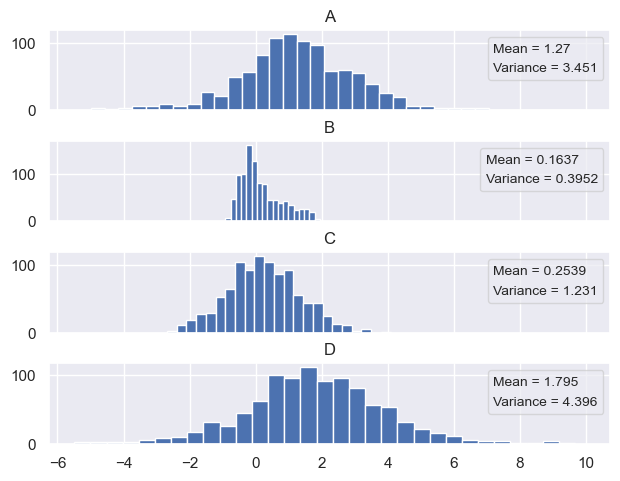

In [58]:
#Histogram
df = data_1000

nodes = list(df.columns.values)
fig, ax = plt.subplots(len(nodes)-1, sharex=True)
fig.tight_layout(pad=1)

handles = [mpl_patches.Rectangle((0, 0), 1, 1, fc="white", ec="white", 
                                 lw=0, alpha=0)] * 2


for i in range(1,len(nodes)):
    ax[i-1].hist(df[nodes[i]],bins = 'auto')
    ax[i-1].set_title(nodes[i])
    labels = []
    labels.append("Mean = {0:.4g}".format(df[nodes[i]].mean()))
    labels.append("Variance = {0:.4g}".format(df[nodes[i]].var()))
    ax[i-1].legend(handles, labels, loc='best', fontsize='small', 
          fancybox=True, framealpha=0.7, 
          handlelength=0, handletextpad=0)
plt.show()


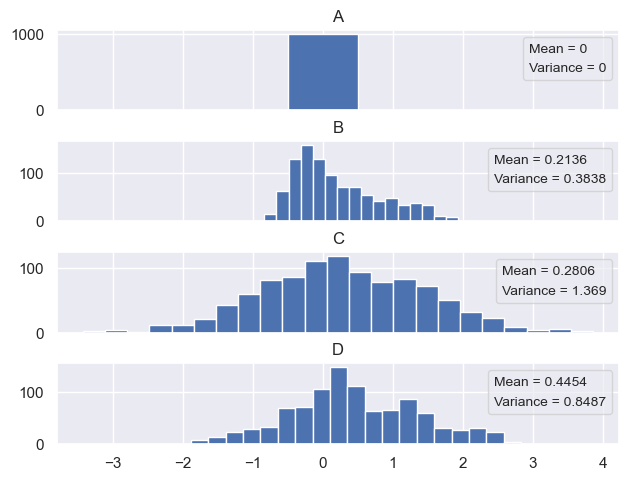

In [71]:
df = data_1000_A_0

nodes = list(df.columns.values)
fig, ax = plt.subplots(len(nodes)-1, sharex=True)
fig.tight_layout(pad=1)

handles = [mpl_patches.Rectangle((0, 0), 1, 1, fc="white", ec="white", 
                                 lw=0, alpha=0)] * 2


for i in range(1,len(nodes)):
    ax[i-1].hist(df[nodes[i]],bins = 'auto')
    ax[i-1].set_title(nodes[i])
    labels = []
    labels.append("Mean = {0:.4g}".format(df[nodes[i]].mean()))
    labels.append("Variance = {0:.4g}".format(df[nodes[i]].var()))
    ax[i-1].legend(handles, labels, loc='best', fontsize='small', 
          fancybox=True, framealpha=0.7, 
          handlelength=0, handletextpad=0)
plt.show()